In [26]:
Нейронная сеть с прямой связью — искусственная нейронная сеть, в которой соединения между узлами не образуют цикл. Такая сеть отличается 
от рекуррентной нейронной сети. Нейронная сеть с прямой связью была первым и самым простым типом искусственной нейронной сети. 
В этой сети информация перемещается только в одном направлении вперед от входных узлов, через скрытые узлы (если они есть) и к 
выходным узлам. В сети нет циклов или петель обратных связей

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import ops
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error

In [28]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = data.data
y = data.target
df.head()
print(data.data.shape)
df

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=987)

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

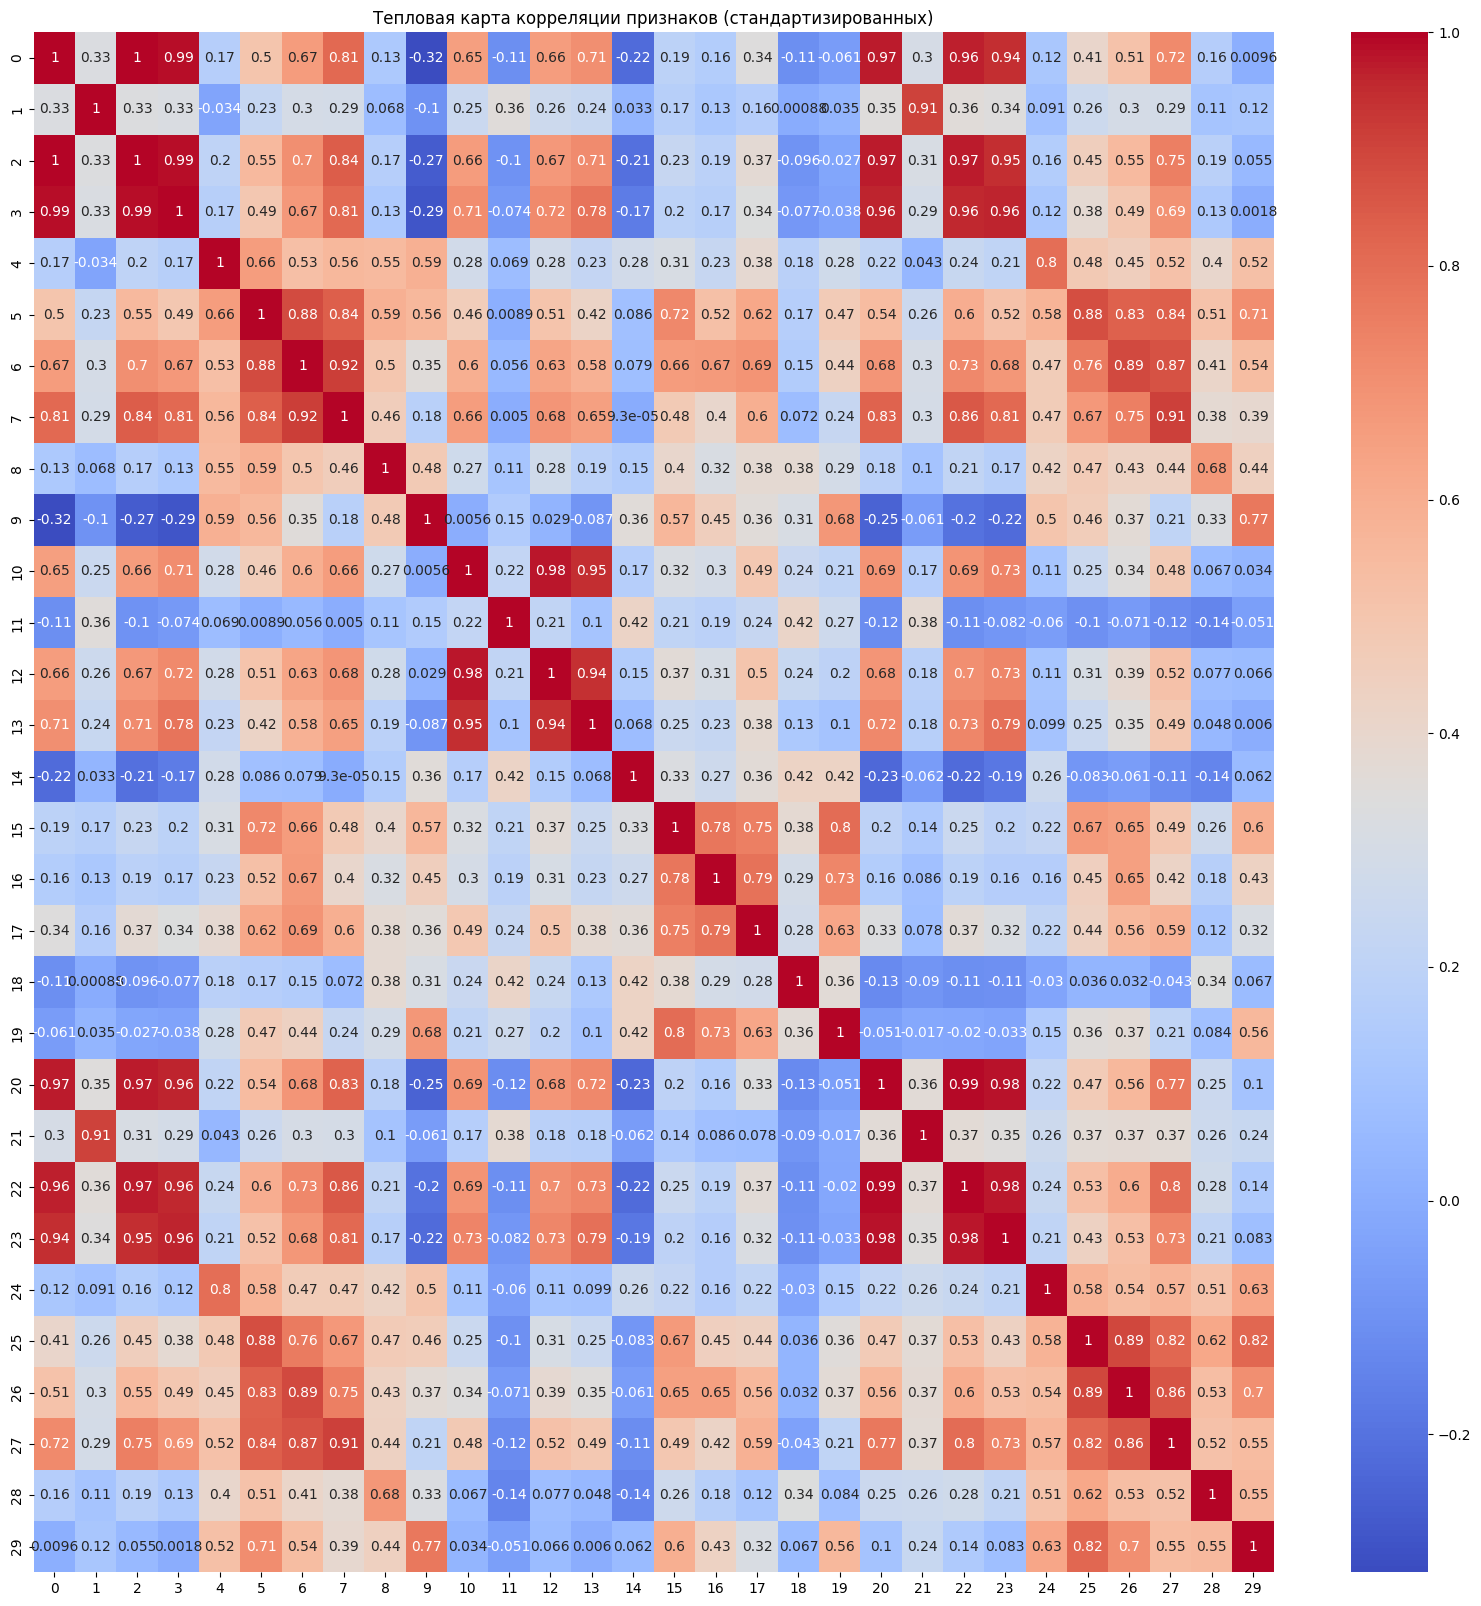

In [31]:
plt.figure(figsize=(20, 20))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляции признаков (стандартизированных)")
plt.show()

In [32]:
model=Sequential([Dense(128,activation='relu', input_shape=(X_scaled.shape[1],)),
                 Dense(64,activation='relu'),
                 Dense(1,activation='sigmoid')])

/usr/local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(X_scaled, y_train,validation_data=(X_test, y_test), epochs=100, batch_size=32, validation_split = 0.1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6490 - loss: 0.5830 - val_accuracy: 0.9474 - val_loss: 0.2699
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9466 - loss: 0.2327 - val_accuracy: 0.9532 - val_loss: 0.1398
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9518 - loss: 0.1384 - val_accuracy: 0.9649 - val_loss: 0.1016
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9875 - loss: 0.0743 - val_accuracy: 0.9649 - val_loss: 0.0862
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.0826 - val_accuracy: 0.9649 - val_loss: 0.0793
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9826 - loss: 0.0636 - val_accuracy: 0.9708 - val_loss: 0.0734
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9753 - loss: 0.0846 - val_accuracy: 0.9766 - val_loss: 0.0684
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9947 - loss: 0.0337 - val_accuracy: 0.9708 - 

In [34]:
model.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9682 - loss: 0.2168 


[0.15560053288936615, 0.9766082167625427]

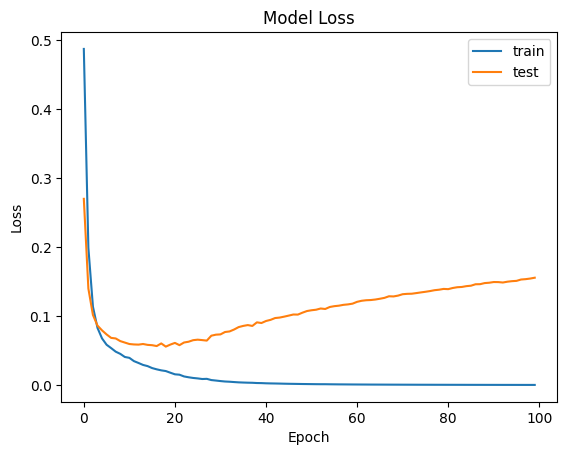

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()